# **Mall Customer Segmentation**

**Customer segmentation** is the process by which we divide our customers up based on common characteristics - such as demographics (if needed) or behaviours, so we can market to those customers more effectively.

---

**Context**

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis.


**Content**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**

You own the mall and want to understand the customers like who can be easily converge **[Target Customers]** so that the sense can be given to marketing team and plan the strategy accordingly.

**The Ideas** ▶
[Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674&sortBy=voteCount)

**Import the Necessary Libraries**:

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# load dataset
#from google.colab import drive
#drive.mount('/drive')
data = pd.read_csv('drive/MyDrive/project/dataset/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#if you save the dataset in your local
#data = pd.read_csv('data/Mall_Customers.csv')
#data.head

**Detail Attributes:**

* **CustomerID** : Unique ID assigned to the customer
* **Gender** : Gender of the customer
* **Age** : Age of the customer
* **Annual Income (k$)** : Annual Income of the customer
* **Spending Score (1-100)** : Score assigned by the mall based on customer behavior and spending nature

In [3]:
data.shape

(200, 5)

There are 200 rows and 5 columns in our dataset.

In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There's **no `missing`** Value. So we can jump to the next stage. (Actually, in real case study sometimes we need to spend a lot of time in this stage (clean the dataset)), to make our dataset is clear enough and ready to analyze or use.

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **Exploration Data Analysis**

This section contains a basic statistical investigation of a given database. It is a crucial point in any analysis as it allows for a better understanding of the underlying data. This part has two main sections: *distributions* and *correlations*.

**Plot by Gender**

In [8]:
males_age = data[data['Gender']=='Male']['Age'] # subset with males age
females_age = data[data['Gender']=='Female']['Age'] # subset with females age

Subset or Split the dataset based on genders [Male and Female].

Color Set:
- Red = #BAD7E9
- Blue = '#EB455F

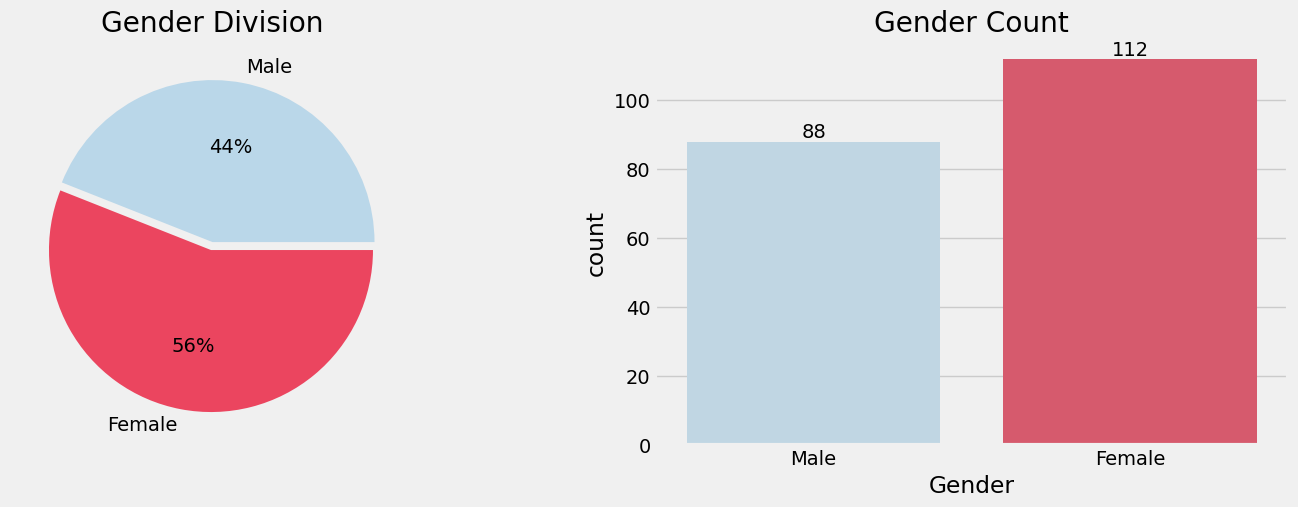

In [18]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,5))

plt.subplot(1,2,1)
palette_color = ['#BAD7E9', '#EB455F']
sizes = [males_age.count(), females_age.count()]
gender = ['Male', 'Female']
plt.pie(sizes, labels=gender, colors=palette_color, explode=(0, 0.05), autopct='%.0f%%')
plt.title('Gender Division')

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Gender' , data = data, palette=pallete_color)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Gender Count')

plt.show()

We can see from 200 total dataset, we find that **Female Customers has largest percentage 56% or 112 of total customers than Male Customer (44% or 88)**. And from this we can conclude that there are more female customers than male.



❓ **The Question is:** Is it really important?

Let's find the answer below...

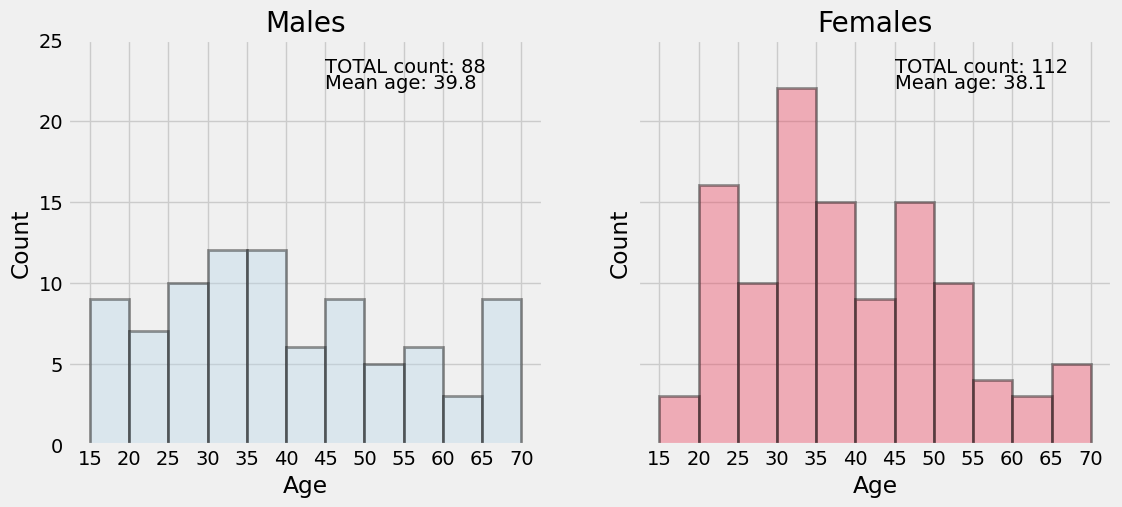

In [19]:
age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#BAD7E9', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#EB455F', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

Distribution of **Male age is more uniform than Female Age**.

1. The average of Male Customer Age is 39.8 and Female is 38.1
2. We can observe that most prominent age range is between **30 - 40 years old** for both Male or Female customers.

**Ploting relations  between Age , Annual Income and Spending Score**

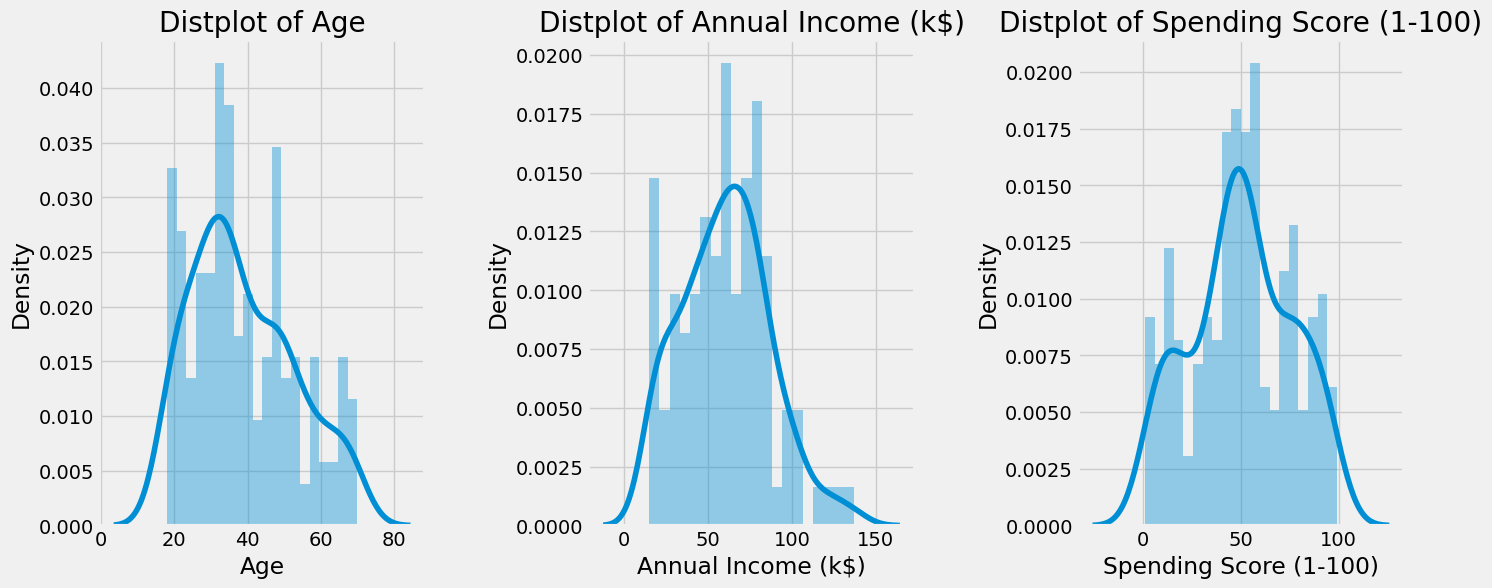

In [20]:
plt.figure(1 , figsize = (15 , 6))
n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.show()

The data isn't too extreme. So we don't have to transform it (or you can do it also - depends on what you want/need).

- Distribution of Age and Annual Income (k$) is positively or rightly skewed.
- Distribution of Spending Score (1-100) has unique pattern. 40 - 60 years old has centered value between 20 and 80 years old.

**Plot Distribution column Age, Annual Income, and Spending Score relate each other.**

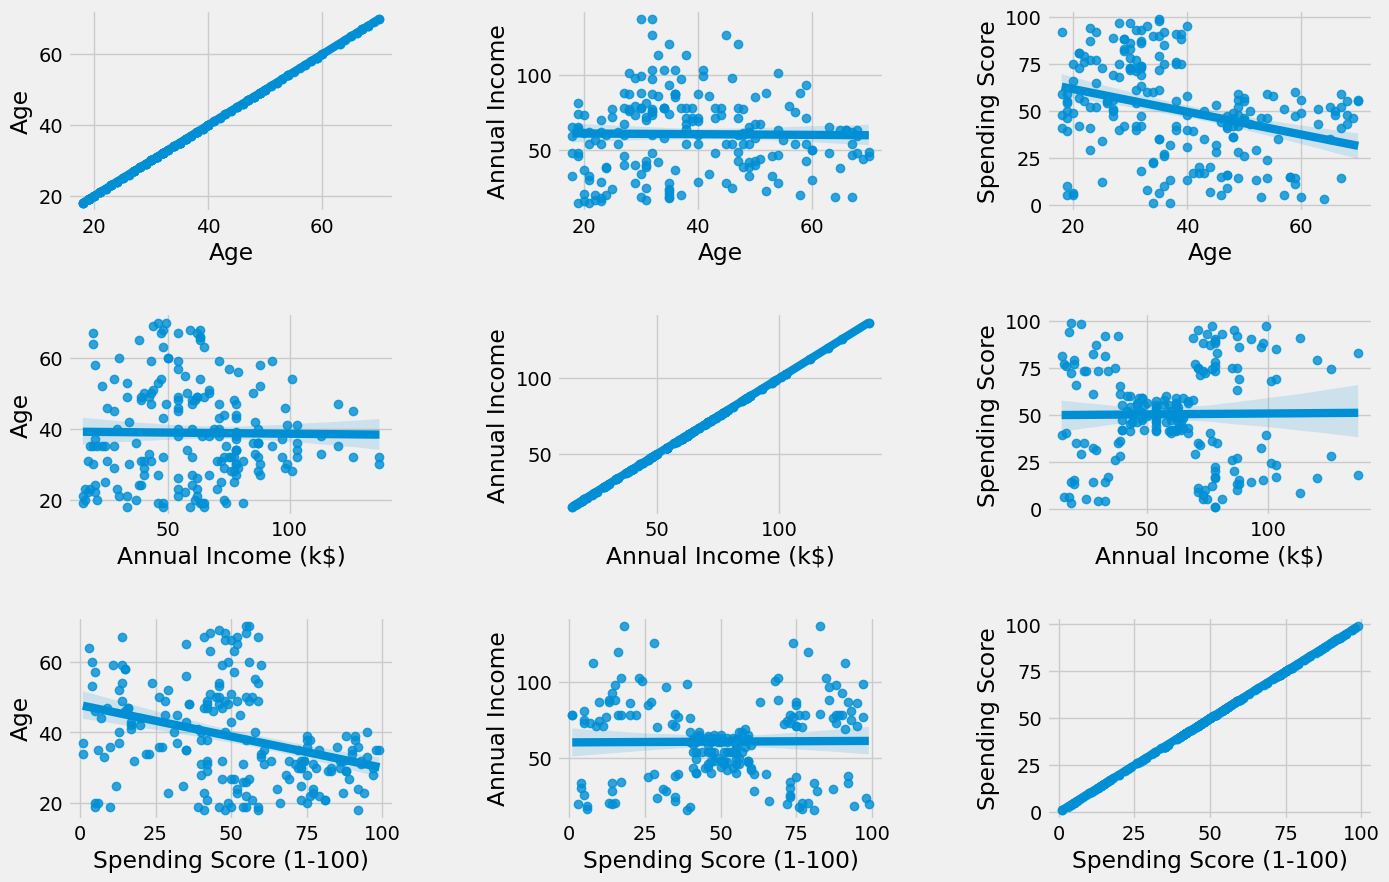

In [21]:
plt.figure(1 , figsize = (15 , 10))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Between each other column, there are have unique corellation or distribution.
- **Spending Score and Annual Income**, we can see that the plot already forms a **segmentation**.

**Plot Distribution using violin and Boxplot**

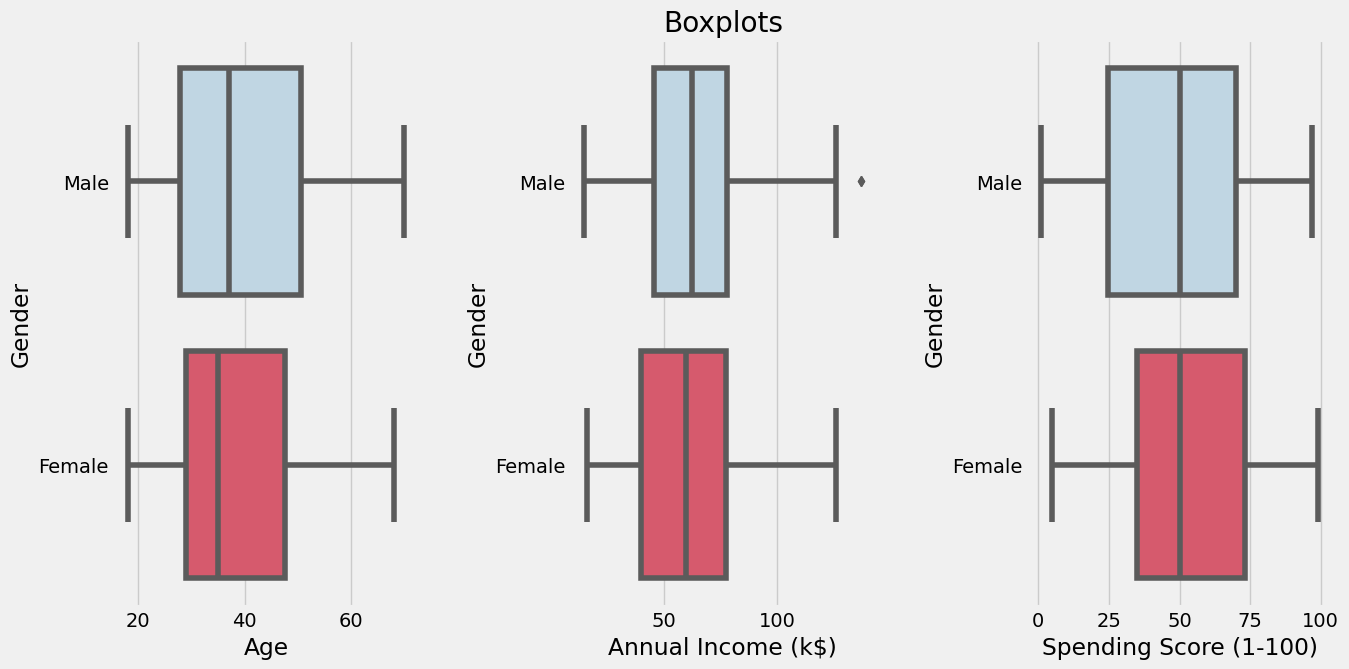

In [25]:
plt.figure(1 , figsize = (14 , 7))
n = 0

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols,y = 'Gender', data = data, palette=palette_color)
    plt.title('Boxplots' if n == 2 else '')
plt.show()

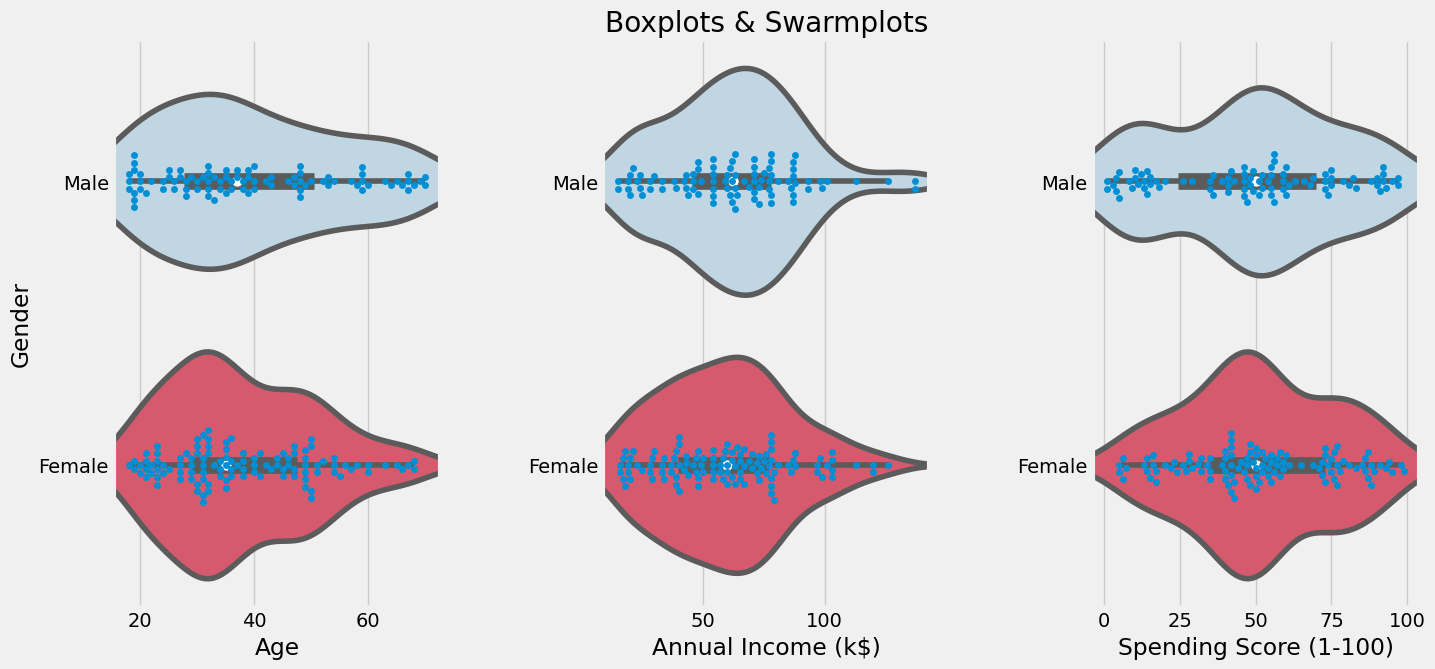

In [26]:
plt.figure(1 , figsize = (15 , 7))
n = 0

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = palette_color)
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

- Age range of **female customers** is from **30 to just below 50** whereas **male customers** Age ranges from just below **30 to 50**.

- For both Genders, a bulge at the age of **30 - 40 can be observed**.

- For Annual Income (k$), **female customer's income starts from 40k** whereas male customer's is above this value.

- **Median Annual Income (k$) for both Genders is near about 60k**, Annual Income of male customers tapers very sharply at the apex with some outliers as compared to female customers.

- **Median Spending Score (1-100) of both Genders is same** despite having different starting points of just below 40 & just above 20 for female and male customers respectively.

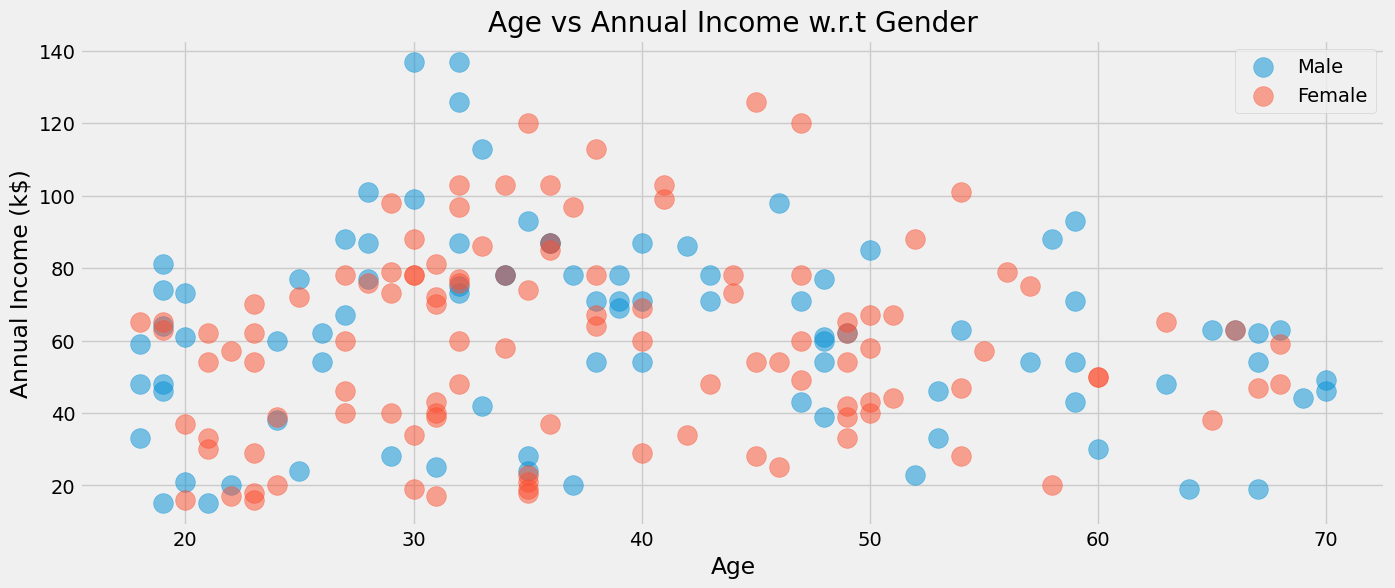

In [27]:
plt.figure(1 , figsize = (15 , 6))

for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

- Annual Income datapoint has an influence on Age, but a little bit with Gender. We can say that Customer with **Age 30 - 50** y.o and **20K to 80K Annual Income** having **high significant to buy**.
- Age **60 - 70** has **low value** or annual income.

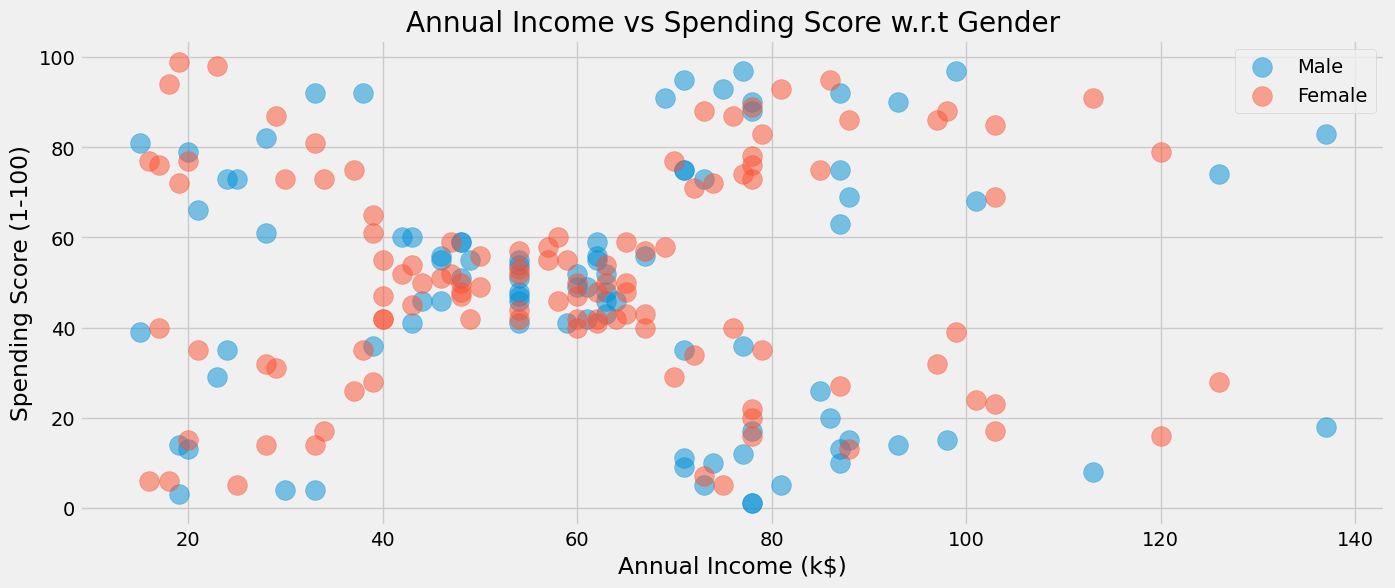

In [28]:
plt.figure(1 , figsize = (15 , 6))

for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

- Annual Income vs Spending Score (1-100) has formed its **own segmentation**. There are 5 segementation. That we can observe further.
- Customer with **40K - 70K Annual Income have high spending habits**.
- Annual Income with **20K - 40K have 2 segmentation**. As well as with Annual Income between **70K - 100K have 2 segmentataion**. First with Spending Score between 0 - 40 and second with 60 - 100. We can say no matter how much Annual Income the customer have, they are always have the **customer who have high/low spending habits**.

**Correlation Matrix**

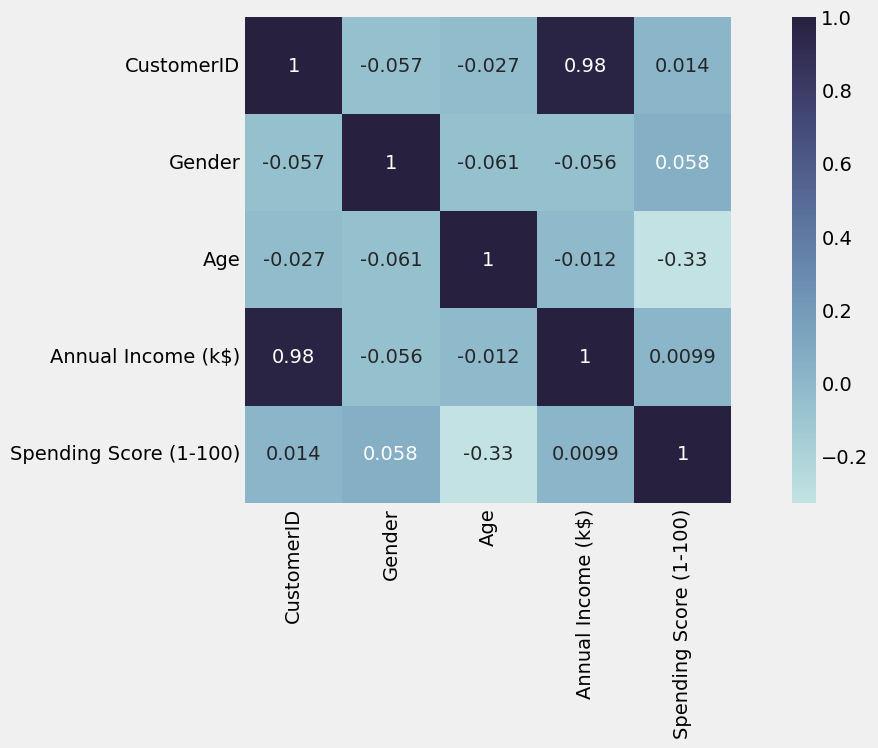

In [39]:
fig, ax = plt.subplots(figsize=(14, 6))
data1 = data.copy()
data1['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
color = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(data1.corr(), cmap=color, square=True, annot=True)

plt.show()

The matrix displayed are same! Upper and Lower Matrix has same value
- CustomerID display a very high correlation with Annual Income (k$).
- Spending Score (1-100) and Age display a negative correlation i.e if value of one feature increases, then another feature's value decreases and vice-versa is true!

## **Summary of EDA**
1. For the above mall data, **female customers are more than male customers**.

2. **Mall customers** can be divided by their Age groups :
    - 20 - 30
    - 30 - 40
    - 40 - 70.

3. **Median Annual Income (k$) of both the genders is about 60k**. It displays 3 groups of values :
    - 0 - 40k
    - 40 - 70k
    - 70 - 140k.

4. **Spending Score (1-100) of female is higher than male customers**. It can also divide the customers into 3 groups :
    - 0 - 40
    - 40 - 60
    - 60 - 100

## **Modeling**
**Unsupervised Learning** : It is a problem where the target variable / feature is unknown. Unsupervised Learning problems widely occur in medical domain where mutliple readings are taken and the underlying diseases are unknown.

However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards **K-Means Clustering** algorithm which does not support categorical features.

**Make a specific column for cluestiration**

In [40]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = data.loc[:,selected_cols]

**Data Scaling**

Actually, for this step you can jump to next step (modeling). But if you want to scale your dataset it's okey. For this one, i want to try use **standarization** by using `StandarScaler()` (you can also try the normalization)

In [41]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

`fit_transform` -> fit our cluster_data (Age, Spending Score, and Annual Income) to scale formating (standarization)

In [42]:
from sklearn.cluster import KMeans
wcss=[]

In [43]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

fit the cluster_data into KMeans model

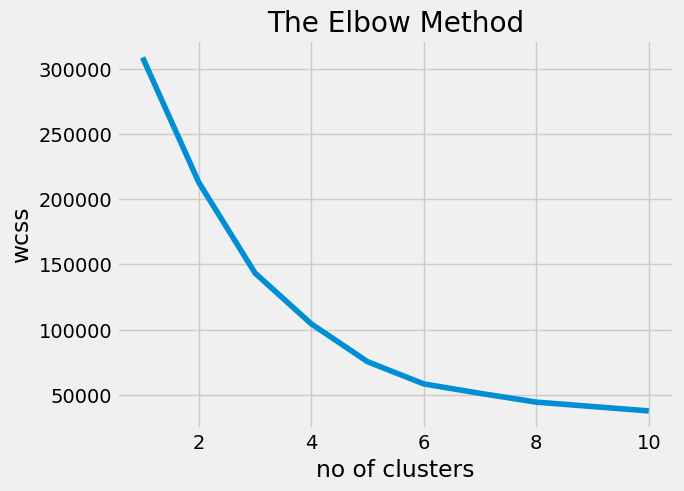

In [44]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

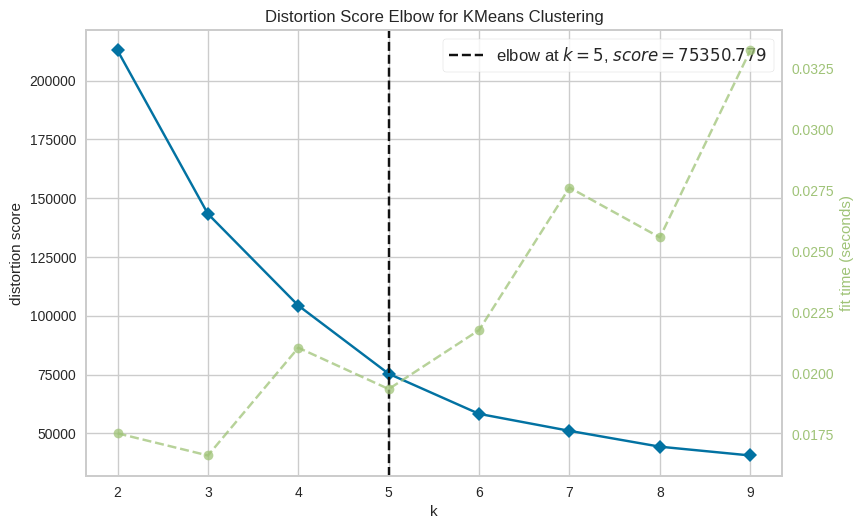

In [45]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(cluster_data)
visualizer.show()
plt.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. However, there is no clear "elbow" visible. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

From the results of the above 2 methods, we select :
- **k : Clusters = 5**

In [46]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(cluster_data) # initialise and fit K-Means model

KM5_clustered = cluster_data.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

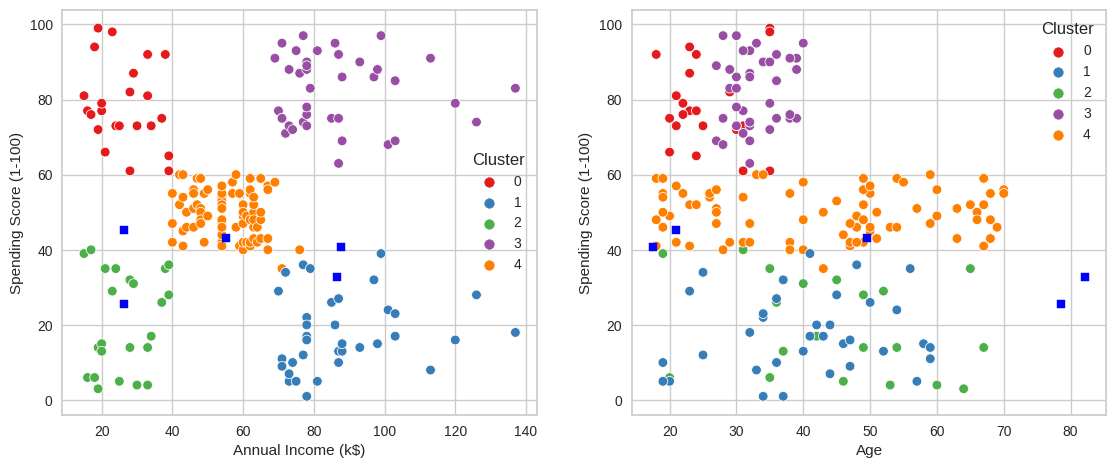

In [47]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered, hue='Cluster',
                ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered, hue = 'Cluster',
                palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

**K-Means algorithm generated the following 5 clusters**:

- customers with **low** annual income and **high** spending score
- customers with **medium** annual income and **medium** spending score
- customers with **high** annual income and **low** spending score
- customers with **high** annual income and **high** spending score
- customers with **low** annual income and **low** spending score

In [48]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,23
1,36
2,23
3,39
4,79


Model Interpretation
- **Cluster 0** (Red Color) ➡ earning low, spending less
- **cluster 1** (Blue Color) ➡ earning high and also spending high [**TARGET 1**]
- **cluster 2** (Green Color) ➡ more average in terms of earning and spending [**TARGET 2**]
- **cluster 3** (Purple Color) ➡ earning less but spending more
- **Cluster 4** (Orange Color) ➡ Earning less but spending more

**Visualize in 3D**

In [49]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

**Silhoutte Plot Clustering**

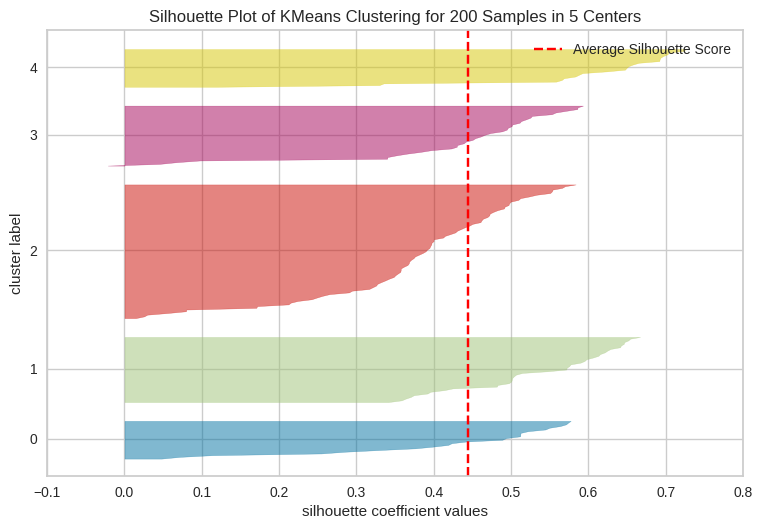

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(cluster_data)
visualizer.show()
plt.show()